<h1 align="center">SALES PREDICTION USING PYTHON</h1>
<h3 align="center">Shreyas Naik</h3>

1. Importing the required libraries and the required dataset
2. Data Exploration and Preprocessing
3. Data Preparation
4. Model Building
5. Saving the Model

## Importing the required libraries and the required dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
advertising_df = pd.read_csv('C:/Users/naiks/Downloads/advertising.csv')
print(advertising_df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


## Data Exploration and Preprocessing

In [3]:
# Display summary information about the dataframe
print("\nSummary information:")
print(advertising_df.info())

# Summary statistics of the dataset
print("\nSummary statistics:")
print(advertising_df.describe())

# Check for missing values
print("\nMissing values:")
print(advertising_df.isnull().sum())


Summary information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Summary statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype

C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

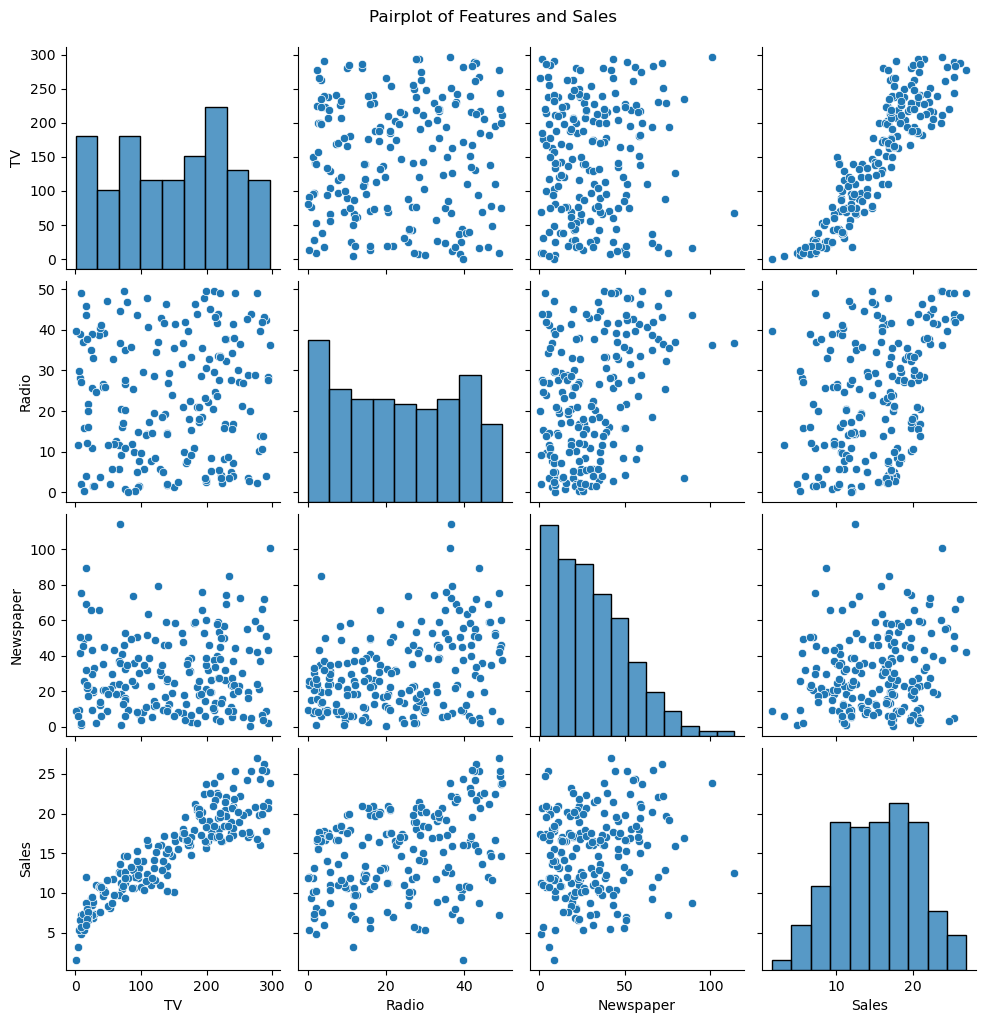

In [4]:
# Pairplot to visualize relationships between variables
sns.pairplot(advertising_df)
plt.suptitle("Pairplot of Features and Sales", y=1.02)
plt.show()

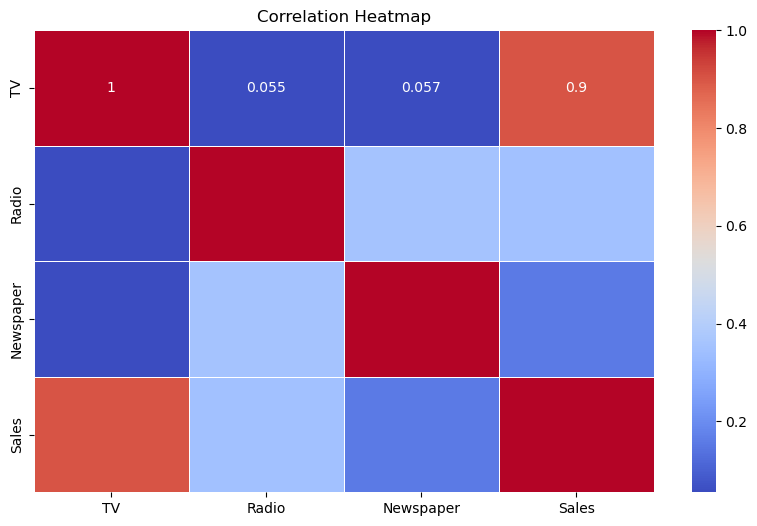

In [5]:
# Heatmap to visualize correlations
plt.figure(figsize=(10, 6))
corr_matrix = advertising_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

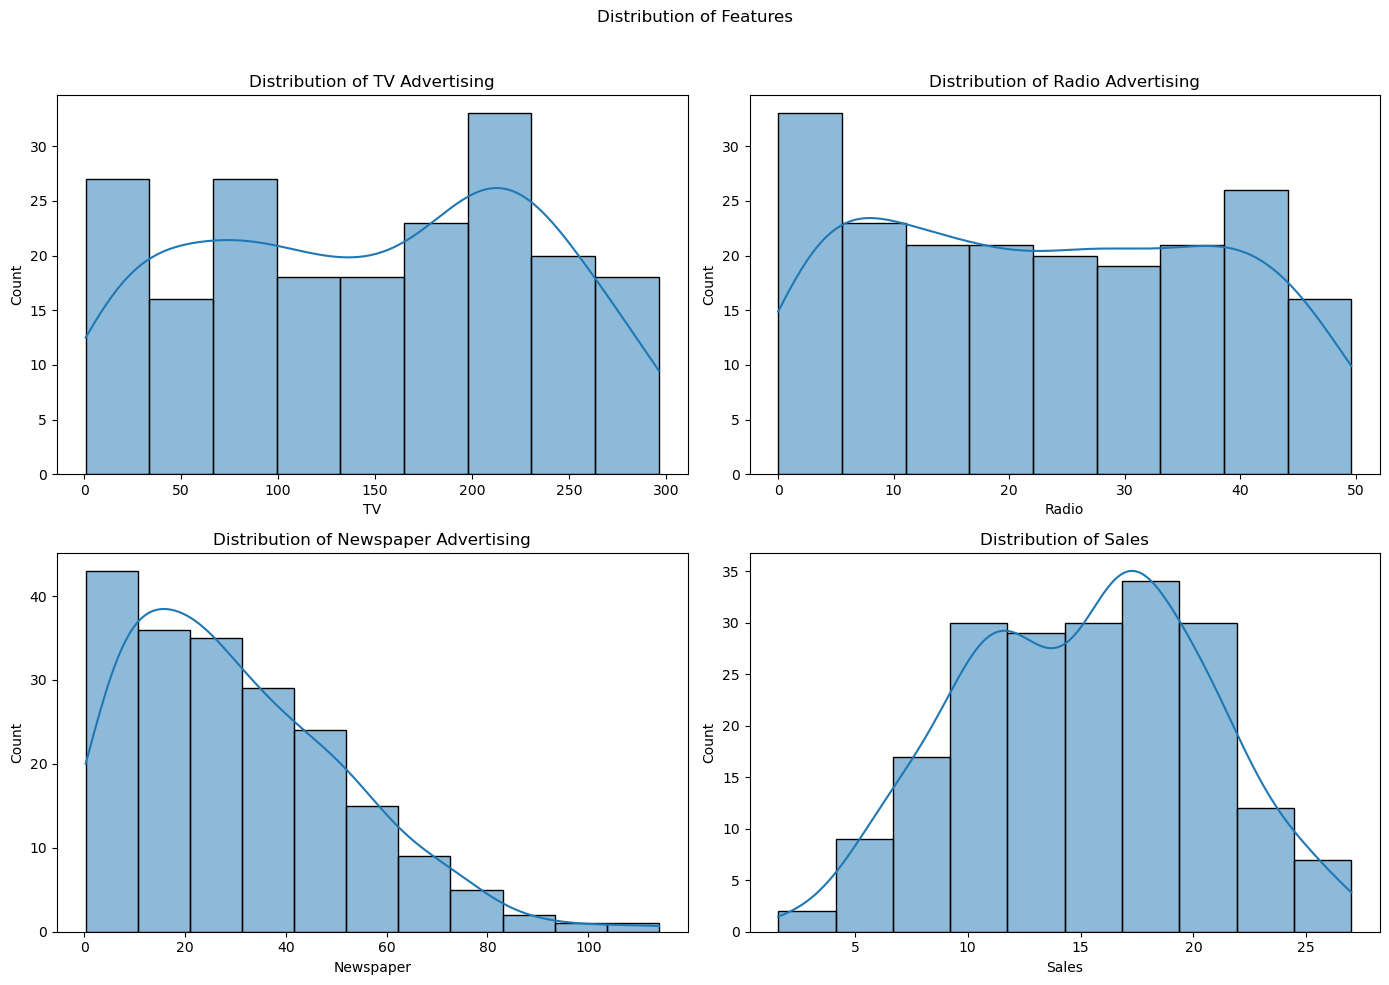

In [6]:
# Distribution of each feature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribution of Features")

sns.histplot(advertising_df['TV'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of TV Advertising')

sns.histplot(advertising_df['Radio'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Radio Advertising')

sns.histplot(advertising_df['Newspaper'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Newspaper Advertising')

sns.histplot(advertising_df['Sales'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Sales')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

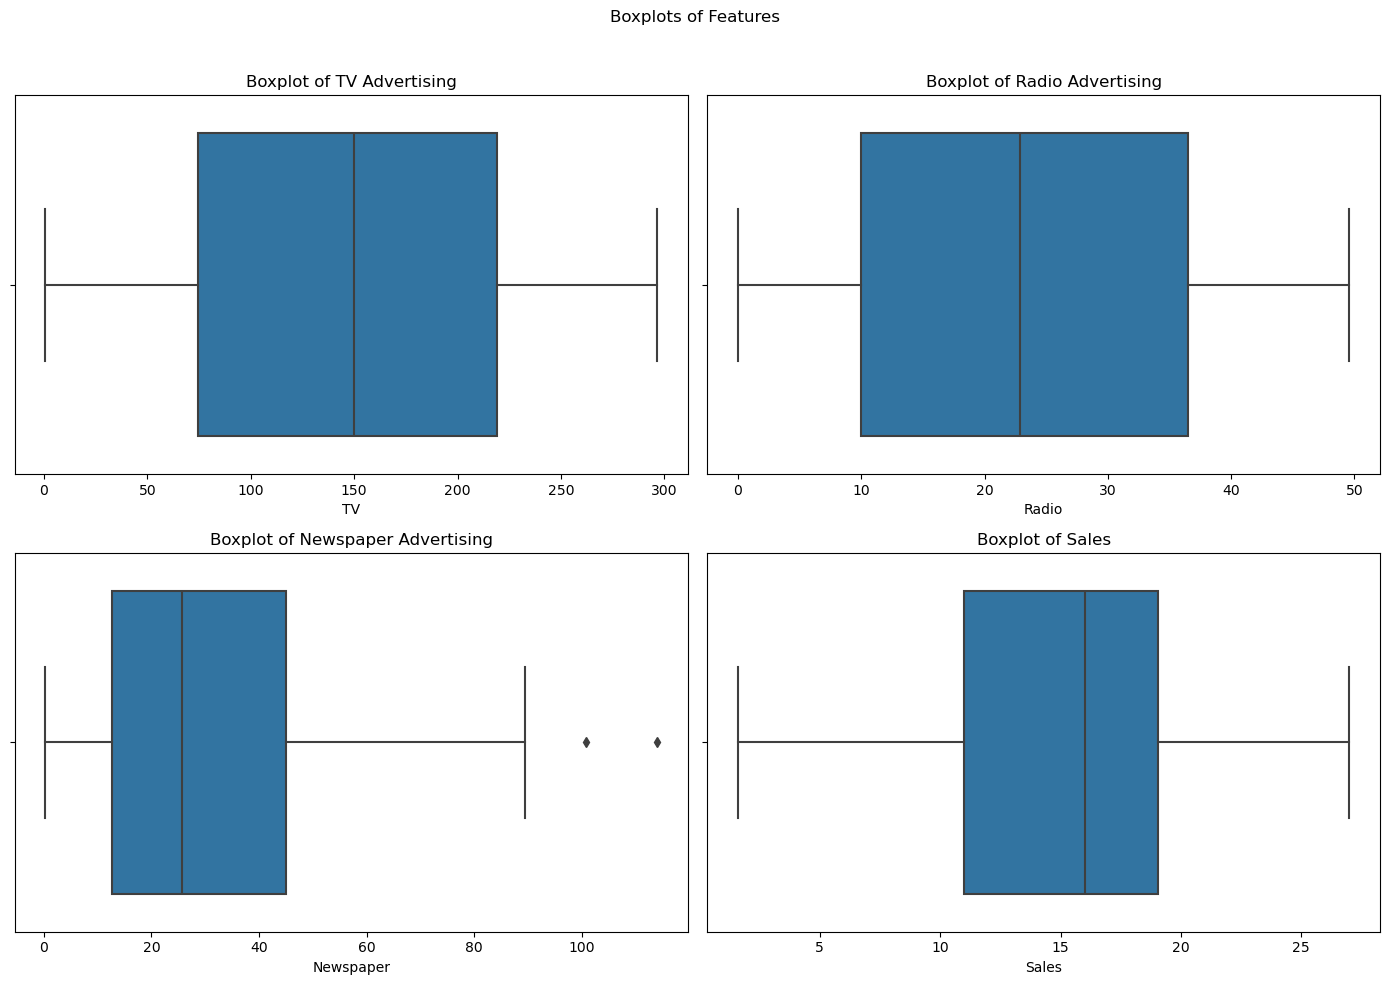

In [7]:
# Boxplots to check for outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Boxplots of Features")

sns.boxplot(x=advertising_df['TV'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of TV Advertising')

sns.boxplot(x=advertising_df['Radio'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Radio Advertising')

sns.boxplot(x=advertising_df['Newspaper'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Newspaper Advertising')

sns.boxplot(x=advertising_df['Sales'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Sales')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

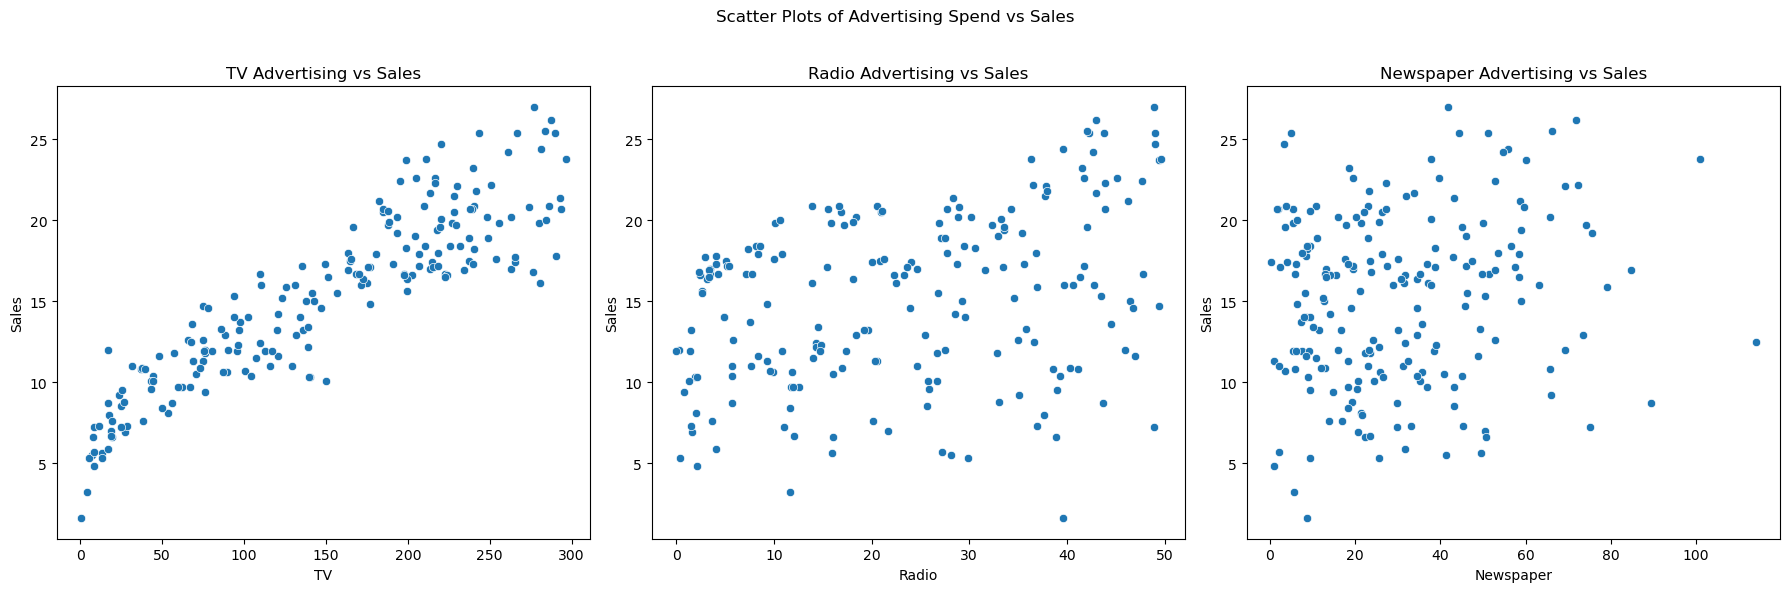

In [8]:
# Scatter plots to examine relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Scatter Plots of Advertising Spend vs Sales")

sns.scatterplot(data=advertising_df, x='TV', y='Sales', ax=axes[0])
axes[0].set_title('TV Advertising vs Sales')

sns.scatterplot(data=advertising_df, x='Radio', y='Sales', ax=axes[1])
axes[1].set_title('Radio Advertising vs Sales')

sns.scatterplot(data=advertising_df, x='Newspaper', y='Sales', ax=axes[2])
axes[2].set_title('Newspaper Advertising vs Sales')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

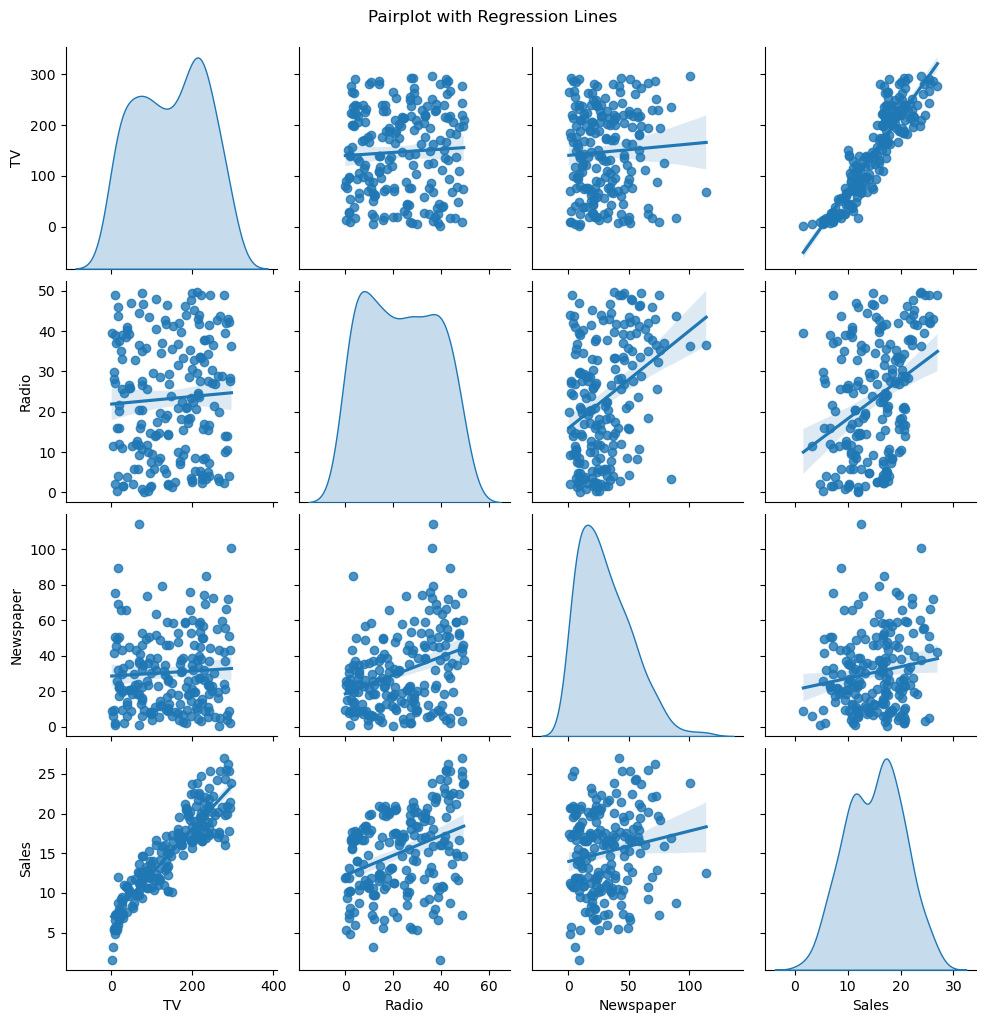

In [9]:
# Pairwise relationships using seaborn pairplot
sns.pairplot(advertising_df, kind="reg", diag_kind="kde")
plt.suptitle("Pairplot with Regression Lines", y=1.02)
plt.show()

In [10]:
# Correlation with Sales
print("\nCorrelation with Sales:")
print(advertising_df.corr()['Sales'].sort_values(ascending=False))


Correlation with Sales:
Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


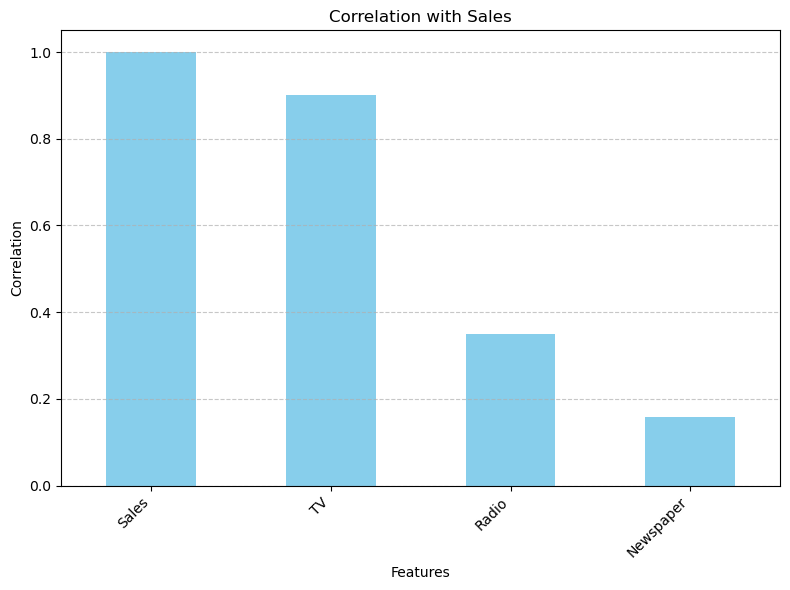

In [11]:
corr_with_sales = advertising_df.corr()['Sales'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
corr_with_sales.plot(kind='bar', color='skyblue')
plt.title('Correlation with Sales')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Data Preparation

In [12]:
# Define features and target variable
features = ['TV', 'Radio', 'Newspaper']
target = 'Sales'

In [13]:
X = advertising_df[features]
y = advertising_df[target]

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building Model

In [15]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Machine': SVR(kernel='linear')
}

In [16]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Cross-validation RMSE
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    
    # Cross-validation R²
    cv_r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Train the model on the entire training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the RMSE and R² on the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        'Cross-Validation RMSE': np.mean(cv_rmse),
        'Cross-Validation R²': np.mean(cv_r2_scores),
        'Test RMSE': test_rmse,
        'Test R²': test_r2
    }

In [17]:
# Print the results
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Cross-Validation RMSE: {result['Cross-Validation RMSE']:.4f}")
    print(f"  Cross-Validation R²: {result['Cross-Validation R²']:.4f}")
    print(f"  Test RMSE: {result['Test RMSE']:.4f}")
    print(f"  Test R²: {result['Test R²']:.4f}\n")

Linear Regression:
  Cross-Validation RMSE: 1.6461
  Cross-Validation R²: 0.8880
  Test RMSE: 1.7052
  Test R²: 0.9059

Random Forest:
  Cross-Validation RMSE: 1.2553
  Cross-Validation R²: 0.9320
  Test RMSE: 1.1989
  Test R²: 0.9535

Gradient Boosting:
  Cross-Validation RMSE: 1.3413
  Cross-Validation R²: 0.9232
  Test RMSE: 1.1204
  Test R²: 0.9594

Decision Tree:
  Cross-Validation RMSE: 1.6147
  Cross-Validation R²: 0.8894
  Test RMSE: 1.8445
  Test R²: 0.8899

Support Vector Machine:
  Cross-Validation RMSE: 1.6534
  Cross-Validation R²: 0.8871
  Test RMSE: 1.6779
  Test R²: 0.9089



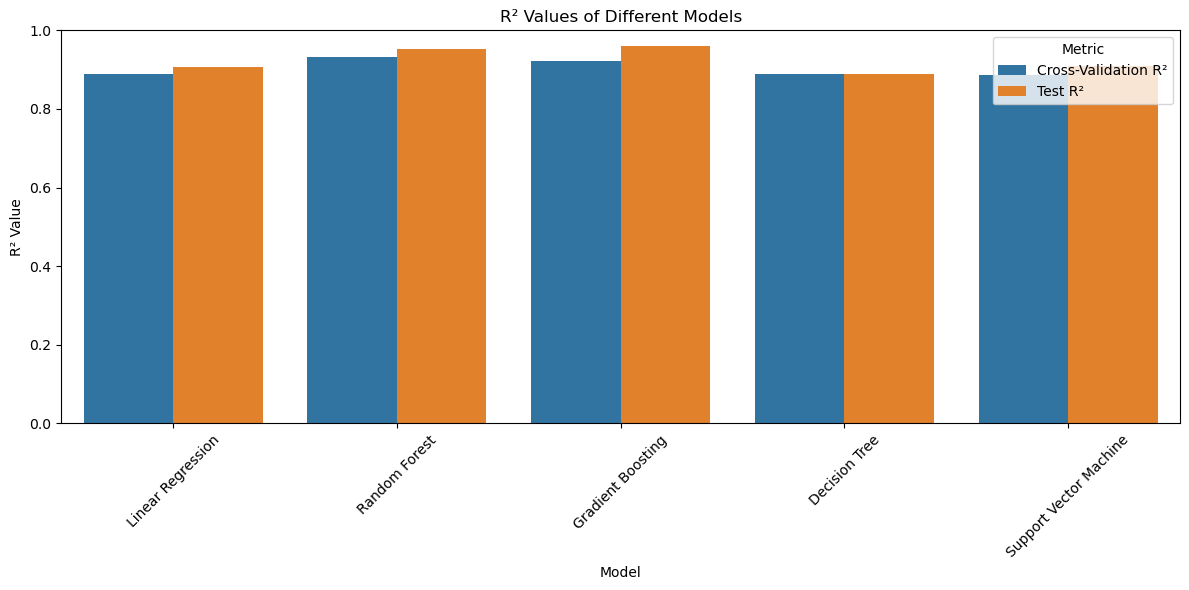

In [18]:
# Convert the results dictionary into a DataFrame for easier plotting
df_results = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Melt the DataFrame to have a long format for seaborn plotting
df_results_melted = df_results.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Filter for R² values only
df_r2 = df_results_melted[df_results_melted['Metric'].str.contains('R²')]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df_r2, x='Model', y='Value', hue='Metric')
plt.title('R² Values of Different Models')
plt.ylabel('R² Value')
plt.xlabel('Model')
plt.ylim(0, 1)  # R² values range between 0 and 1
plt.legend(title='Metric', loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Saving the model

In [20]:
import pickle

# File path where you want to save the model
model_filename = 'sales_model.pkl'

# Save the best model using pickle
with open(model_filename, 'wb') as f:
    pickle.dump(GradientBoostingRegressor, f)

print("Model saved successfully as", model_filename)

Model saved successfully as sales_model.pkl
